In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive

gpg: keybox '/tmp/tmpgjureof0/pubring.gpg' created
gpg: /tmp/tmpgjureof0/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


KeyboardInterrupt: ignored

 
# Python'da Veri Görselleştirme
Kaynak:[Pandas & Seaborn - A guide to handle & visualize data in Python](https://)

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [2]:
import os
os.chdir("/content/drive/TITANIC")
!pwd

/content/drive/TITANIC


Neden **Pandas** kütüphanesi kullanıyoruz? Çünkü **NumPy** üzerinde inşa edilmiştir. Manipülasyon ve analiz için daha yüksek seviyeli yöntemler sağlamak için çok boyutlu dizileri ve hızlı operasyonları dahili olarak kullanır. **Seaborn**'u da ***Titatic*** verisini çekmek için kullanıyoruz.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

# Veri kümseini yükle
titanic = sns.load_dataset('titanic')

### Veri setine bir gözatalım :)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### *Örnek bir sorgu yapalım* ve aynı cinsiyet grubuna ait 1. ve 3. sınıf ve yaşamıyor olan yolcuların bilet ücretlerini, yolculukta yalnız olup olmadıklarını, hangi şehirden olduklarını gözlemleyelim.

In [6]:
titanic[
    (titanic.sex == 'female')
    & (titanic['class'].isin(['First', 'Third']))
    & (titanic.age > 30)
    & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
49,0,3,female,18.0,1,0,17.8000,S,Third,woman,False,NaN,Southampton,no,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
100,0,3,female,28.0,0,0,7.8958,S,Third,woman,False,NaN,Southampton,no,True
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False
114,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


Veriden bir grup çekelim: Hangi ülke ve şehirden geldikleri bilgisi olsun.

In [0]:
# Datadan küçük bir parça çekelim, yaşadıkları şehir, şehirde yaşadıkları süre ve şehir yaşı bilgileri olsun
towns_dic = {
    'name': ['Southampton', 'Cherbourg', 'Queenstown', 'Montevideo'],
    'country': ['United Kingdom', 'France', 'United Kingdom', 'Uruguay'],
    'population': [236900, 37121, 12347, 1305000],
    'age': [np.random.randint(500, 1000) for _ in range(4)]
}
towns_df = pd.DataFrame(towns_dic)

In [8]:
(titanic.merge(
  towns_df, 
  left_on='embark_town', right_on='name', 
  how='left',
  indicator=True,
  suffixes=('_passenger', '_city')
)).head()
# 'head' takes the last n elements of the DataFrame

,survived,pclass,sex,age_passenger,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_city,country,name,population,_merge
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,905.0,United Kingdom,Southampton,236900.0,both
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,921.0,France,Cherbourg,37121.0,both
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,905.0,United Kingdom,Southampton,236900.0,both
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,905.0,United Kingdom,Southampton,236900.0,both
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,905.0,United Kingdom,Southampton,236900.0,both


**distplot:** Verilerinizi keşfederken görmek istediğiniz ilk şey, değişkenlerinizin dağılımıdır. 
Örneğin, Titanic’in yolcularının yaş dağılımını görelim.

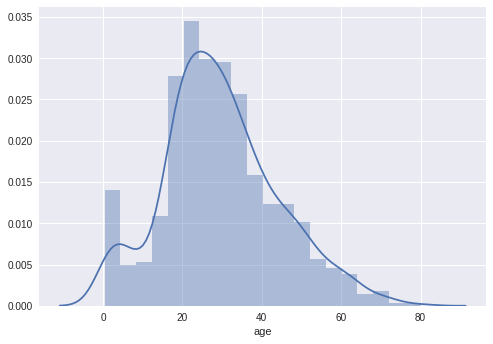

In [9]:
sns.distplot(titanic.age.dropna())
sns.plt.show()

**FacetGrid:** Bir grafiği (örneğin sonuncusu) bazı kategorilerden ayırmak isteyebiliriz!

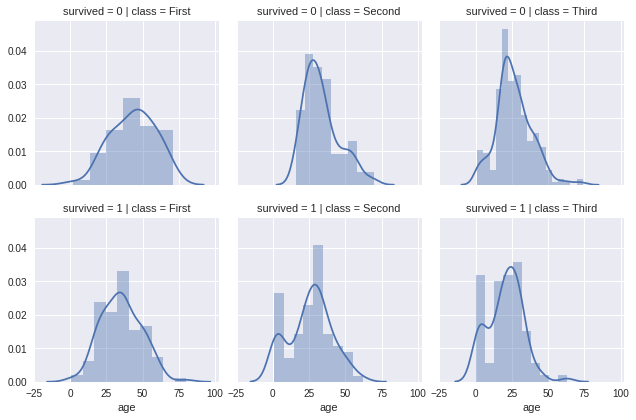

In [10]:
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")
sns.plt.show()

**jointplot:** Bu metot, veri değişkenlerinin hem dağılımları hem de çekirdek yoğunluğu tahmin edicileri ve verilere uyan bir opsiyonel regresyon ile birlikte iki değişkene göre görüntülenmesi için kullanılır. **Reg** ile, verilere uygun bir regresyon istediğimizi belirtiyoruz.
Bu durumda, regresyonun gösterdiği yukarı doğru küçük bir eğilim olduğu görünse de, ***Pearson korelasyon katsayısı*** ile gösterildiği gibi *“yaş”* ve *“ücret”* değişkenleri arasında hemen hemen hiçbir ilişki yoktur.

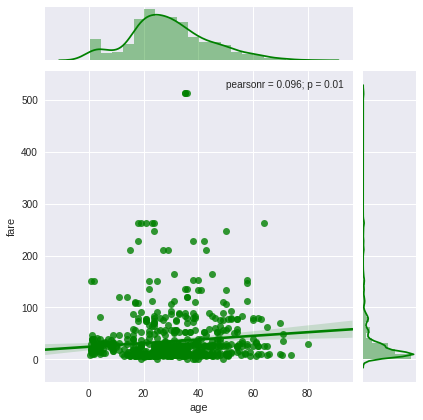

In [14]:
sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='g')
sns.plt.show()

Son olarak bir veri ile ilgili oluşturulabilecek en havalı şey korelasyon matrisidir :)
Sütunlarının tüm çiftleri arasındaki Pearson'ları (bir başka  yöntem de olabilir) korelasyon katsayısını hesaplayan bir düzeltme yöntemine sahiptir.

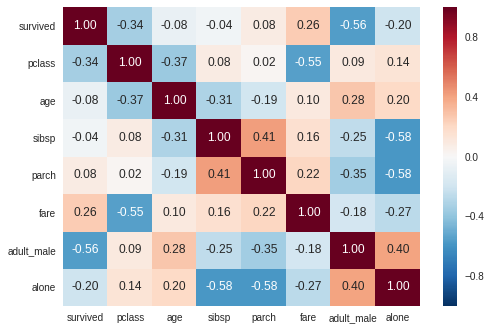

In [13]:
df = titanic.pivot_table(index='embark_town', columns='age_group', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")